In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Homework 2 - Part 2 Solution

1. Implement in python the ridge regression with gradient descent.
Note that we now have parameters $\mathbf{w}$ and $b$
we want to learn on the training set, as well an hyper-parameter
to control the capacity of our model: $\lambda$.
There are also hyper-parameters for the optimization: the step-size $\eta$,
and potentially the number of steps.

In [0]:
# Q2.1 : Ridge regression with gradient descent

class RidgeRegression:
  
  def __init__(self, n_dims=1, lambda_=.01):
    self.w = np.zeros((n_dims,))
    self.b = 0.
    self.lambda_ = lambda_
  
  def regression_gradient(self, x, y, 
                          step_size=1e-2, 
                          iterations=1000,
                          stopping_criterion = 0.01,
                          normalize=False):
    """Train the regression model with iterations steps of gradients
    on x of shape (n, d) and y of shape (n,).
    If normalize is True, we normalize along each dimension of x and y to better 
    condition the optimization problem.
    """
    if normalize:
      xmean = x.mean(axis=0)
      xstd = x.std(axis=0)
      x = (x-xmean) /xstd
      # technically we should also correct the regularzation
      # but there's no easy way
    
    for i in range(iterations):
      diff = 2*(self.predict(x) -  y)  # prediction error
      gb = diff.mean(axis=0)  # gradient / bias
      gw = (diff[:, None] * x).mean(axis=0) # gradient / weights
      gw_reg = gw + self.lambda_ * self.w  # add regularization
      
      # weights updates
      self.b -= step_size * gb
      self.w -= step_size * gw_reg
    
    if normalize:
      self.b = self.b - np.sum(self.w * xmean/xstd)
      self.w = self.w / xstd
  
  def analytic_solve(self, x, y):
    X = np.hstack([x, np.ones([x.shape[0],1])])
    theta = np.linalg.solve(X.T.dot(X) + self.lambda_*np.eye(X.shape[1]), X.T.dot(y))
    self.w = theta[:-1]
    self.b = theta[-1]
  
  def predict(self, x):
    """Return the prediction w^T x + b.
    x is an array n*d where n is the number of points and d is the dimension
    the output is an n*1 array
    """
    return np.dot(x, self.w) + self.b

  def mse(self, x, y):
    """Return the mean squared error of the model on data (x,y)"""
    return np.mean((self.predict(x) - y)**2)

2. Consider the function $h(x)=\sin(x)+0.3x-1$.
Draw a dataset $D_n$ of pairs $(x,\,h(x))$ with $n=15$ points
where $x$ is drawn uniformly at random in the interval $\left[-5,5\right]$.
Make sure to use the same set $D_n$ for all the plots below.

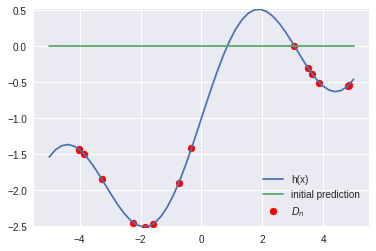

In [279]:
# Q2.2 : Draw a dataset of n=15 points

def h(x):
  return np.sin(x) + .3*x - 1


x = np.random.uniform(-5, 5, size=(15,1))
y = h(x).squeeze()

def plot_data(xplot, x, y, axe=None):
  
  if axe is None:
    axe = plt.gca()
    
  yplot = h(xplot)

  axe.plot(xplot, yplot, label='h(x)')
  axe.set_ylim([min(yplot), max(yplot)])
  
  axe.scatter(x, y, c='red', label='$D_n$')
  axe.legend()
  
xplot = np.linspace(-5, 5)
plot_data(xplot, x, y)

# value of the model initially
model = RidgeRegression(1, 0.1)
plt.plot(xplot, model.predict(xplot[:, None]), label='initial prediction')
plt.legend()


In [280]:
 # Sanity check: all the methods implemented are equivalent
model = RidgeRegression()
model.regression_gradient(x, y , normalize=False)
print(model.w, model.b)
model = RidgeRegression()
model.regression_gradient(x, y , normalize=True)
print(model.w, model.b)
model.analytic_solve(x, y)
print(model.w, model.b)


[0.19344144] -1.309959190949709
[0.19256626] -1.309856298390435
[0.1935081] -1.3090943006546927


3. With $\lambda=0$, train your model on $D_n$.
Then plot on the interval $\left[-10,10\right]$:
the points from the training set $D_n$, the curve $h(x)$,
and the curve of the function learned by your model using 
gradient descent.
Make a clean legend.  
**Remark:**
The solution you found with gradient descent should converge to
the straight line that is closer from the $n$ points
(and also to the analytical solution).
Be ready to adjust your step-size (small enough) and number of iterations (large enough)
to reach this result.
4. on the same graph, add the predictions you get
for intermediate value of $\lambda$,
and  for a large value of $\lambda$.
Your plot should include the value of $\lambda$ in the legend.
It should illustrate qualitatively what happens when $\lambda$ increases.

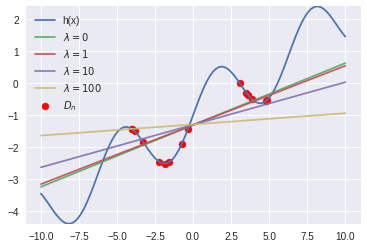

In [281]:
# Q2.3 and 2.4 : Train model with various lambda

predict_support = np.linspace(-10, 10, 100)[:, None]
plot_data(predict_support, x, y)

lambdas = [0,1,10,100]
for lamb in lambdas:
  model = RidgeRegression(lambda_=lamb)
  model.regression_gradient(x, y)
  y_predict = model.predict(predict_support)
  plt.plot(predict_support, y_predict, alpha=0.9,
           label='$\lambda={}$'.format(lamb))

plt.legend()

5. Draw another dataset $ D_\text{test} $ of $100$ points by following the same procedure as $D_n$.
Train your linear model on $D_n$ for $\lambda$ taking values in $[0.0001, 0.001, 0.01, 0.1, 1, 10 ,100]$.
For each value of $\lambda$, measure the average quadratic loss on $D_\text{test}$.
Report these values on a graph with $\lambda$ on the x-axis
and the loss value on the y-axis.

In [0]:
# Q 2.5
x_test = np.random.uniform(-5, 5, size=(100, 1))
y_test = h(x_test).flatten()

In [0]:
lambdas = 10. ** np.arange(-4, 3)
mse_train = []
mse_test = []
for lambda_ in lambdas:
  model = RidgeRegression(lambda_=lambda_)
  model.regression_gradient(x, y)
  mse_train.append(model.mse(x, y))
  mse_test.append(model.mse(x_test, y_test))
  

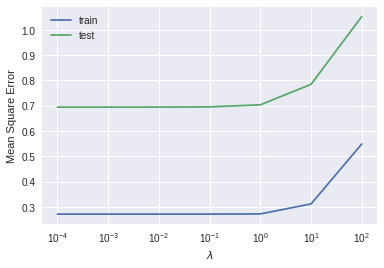

In [284]:
plt.plot(lambdas, mse_train, label='train')
plt.plot(lambdas, mse_test, label='test')
plt.xscale('log')
plt.ylabel('Mean Square Error')
plt.xlabel(r'$\lambda$')
plt.legend()

When we increase $\lambda$, we decrease the capacity of our model , which ends up increasing the mean square error.

Most of the time, the training error remain below the test error.
However,  depending on the sampling of x, the test error may be smaller than the train error. This is an artifact of the small data regime and the very low model capacity: there is so little data points that they may be ver hard to fit with a straight line, even though the true distribution has a linear trend.

6. Use the technique studied in problem 1.3 above to
learn a non-linear function of $x$. Specifically, use Ridge regression with
the fixed pre-processing $\phi_{{\rm poly}^{l}}$
described above to get a polynomial regression of order $l$.
Apply this technique with $\lambda=0.01$ and different values of $l$.
Plot a graph similar to question 2.2 with all the prediction functions you got.
Don't plot too many functions to keep it readable and precise the value of $l$ in the legend.

#### ANSWER
As the dimension increase, it becomes more and more difficult to train the model well with gradient descent. For dimension 10, one needs a ridiculously small step size nad large number of updates to converge.

This is partly due to the ill-conditioning of the problem: monomials of high degree tend to be much larger, so they need to be multiplied by a much smaller weight, so that the step-size for this weight needs to be much smaller. This can be avoided by **normalizing** the data before training, and updating the weight afterwards. 

However this changes the effect of the regularizaton. The most simple approach to get the desired answer is to use the analytical solution and let the algorithmic magic of `numpy.linalg.solve` deal with this problem. 

If you got an answer with the analytical solution, or with gradient descent on normalized data, you get full mark. You also get full mark if you got a decent answer for polynomials of degree up to 3 with unnomarlized gradient descent and hyperparameter tuning. 

In [0]:
# Q 2.6
def phi(x, d=2):
  out = np.zeros((x.shape[0], d))
  for i in range(d):
    out[:, i] = x[:, 0]**(i+1)
  return out

# COMPUTING
# note that for higher degrees of polynomials we require smaller step_sizes and
# more iterations in order for the algorithm to converge
phidims = np.arange(1, 13)
regularization = 0.01
models = {}
analytics = {}

for d in phidims:
  phix = phi(x, d)
  m = RidgeRegression(lambda_=regularization, n_dims=d)
  m.regression_gradient(phix, y, step_size=0.01,
                        iterations=int(2e4), normalize=True)
  
  #  compare with the analytical solution
  a = RidgeRegression(lambda_=regularization, n_dims=d)
  a.analytic_solve(phix, y)
 
  models[d] = m
  analytics[d] = a
  

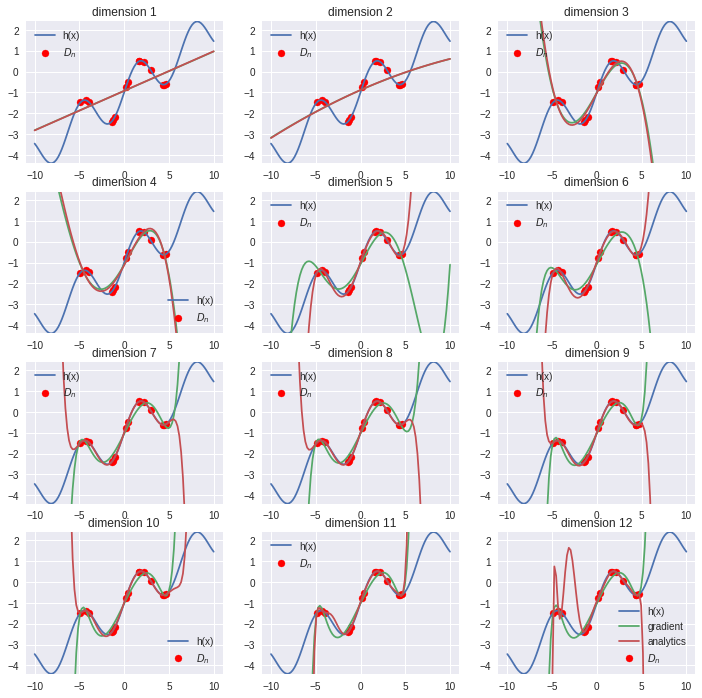

In [272]:
# PLOTTING
plt.figure(figsize=(12, 12))
xx = np.linspace(-10,10,100)[:, None]

for dim, model in models.items():
  ax = plt.subplot(4, 3, dim)
  plot_data(xx, x, y, axe=ax)
  
  y_predict = model.predict(phi(xx, d=dim))
  ax.plot(xx, y_predict, label='gradient')
  
  y_predict = analytics[dim].predict(phi(xx, d=dim))
  ax.plot(xx, y_predict, label='analytics')
  
  ax.set_title(f'dimension {dim}')
  
plt.legend()

7. Comment on what happens when $l$ increases.
What happens to the empirical risk (loss on $D_n$),
and to the true risk (loss on $D_\text{test}$)?

In [0]:
# We use the analytical solutions to answer this question

mse_train = []
mse_test = []
for d, m in analytics.items():
  mse_train.append(m.mse(phi(x, d),y))
  mse_test.append(m.mse(phi(x_test, d), y_test))
  

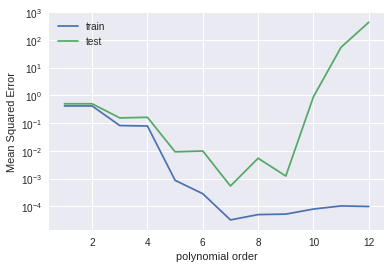

In [211]:
plt.plot(analytics.keys(), mse_train, label='train')
plt.plot(analytics.keys(), mse_test, label='test')
plt.legend()
plt.yscale('log')
plt.ylabel('Mean Squared Error')
plt.xlabel('polynomial order')
plt.legend()


We observe that the test error reaches a minimum for $d$ between 7 and 9. For larger dimensions,  we **overfit**: low training error and high test error. For smaller dimensions, we **underfit**: high train and test error, but small generalization gap. Note that these curves are noisy and depend on the initial samploing of x because there is so few data points.